<a href="https://colab.research.google.com/github/peimani/Project4/blob/master/Copy_of_Image_Classification_w_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **X-Ray Image Visualization**


> Using Image Classification with Deep Learning, we will create a program which will be able to take an x-ray and classify it with a diagnosis of Pneumonia or Normal.




> By Arash Peimani (Flatiron Full Time Cohort)


> Instructor: James Irving



1.   Dataset Used: [Kaggle ](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
2.   Dataset Raw: [Mendeley](https://https://data.mendeley.com/datasets/rscbjbr9sj/3)





# Image Recognition

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# **Installs and Imports**

In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(321)
tf.random.set_seed(321)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys, glob

import datetime as dt
from sklearn import metrics
from tzlocal import get_localzone

In [4]:
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks, models, layers, optimizers, regularizers
from keras.preprocessing.image import ImageDataGenerator

## Load the Data

In [6]:
# Get the Directory Paths of the Image sets
train_img = '/content/drive/MyDrive/Colab Notebooks/Data_Files/chest_xray/chest_xray/train'
val_img = '/content/drive/MyDrive/Colab Notebooks/Data_Files/chest_xray/chest_xray/val'
test_img = '/content/drive/MyDrive/Colab Notebooks/Data_Files/chest_xray/chest_xray/test'

### Preview the Data

Train set:
PNEUMONIA=3883
NORMAL=5462
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=9
NORMAL=9


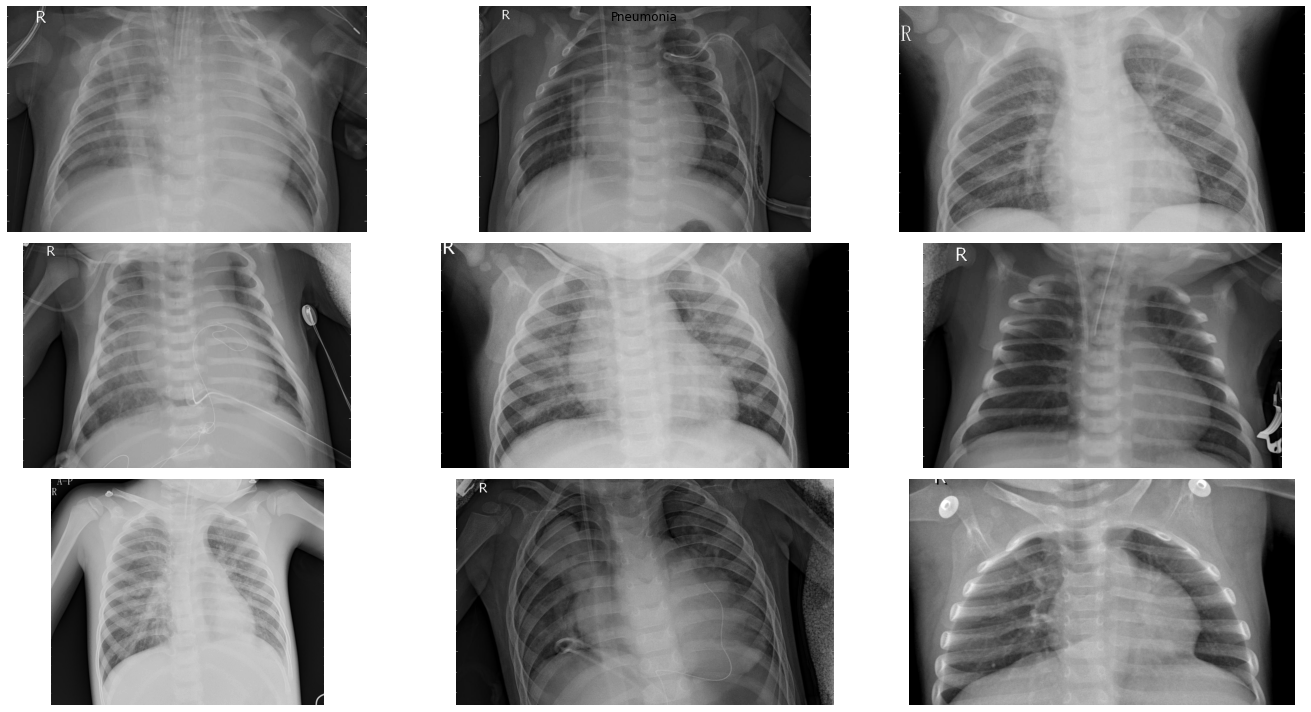

In [7]:

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_img, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_img, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_img, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_img, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_img, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_img, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/Colab Notebooks/Data_Files/train/PNEUMONIA")

pneumonia_img = '/content/drive/MyDrive/Colab Notebooks/Data_Files/train/PNEUMONIA'


plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_img, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.suptitle('Pneumonia')
plt.tight_layout()

## Data Preparation

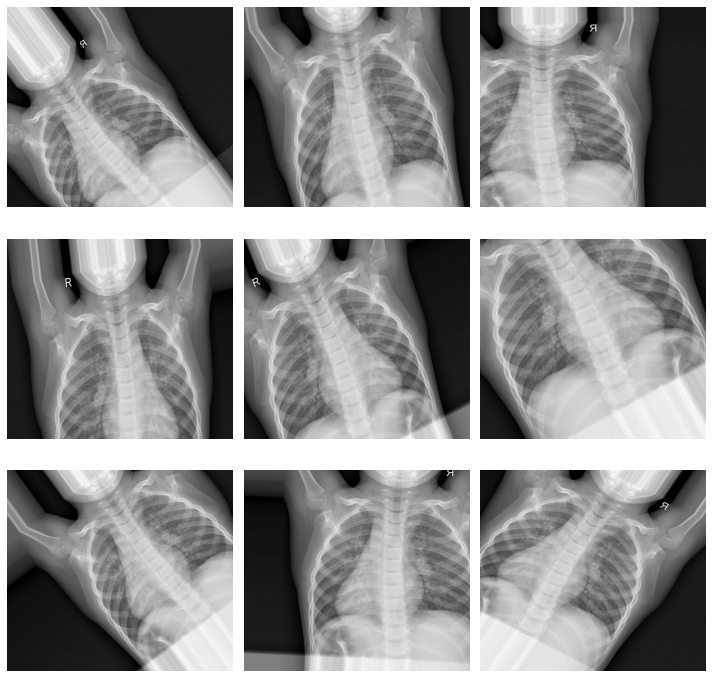

In [8]:
#Preview the images

normal = os.listdir("/content/drive/MyDrive/Colab Notebooks/Data_Files/chest_xray/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/Colab Notebooks/Data_Files/chest_xray/chest_xray/train/NORMAL"

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

### Class Imbalance: 
  There are 1341 'NORMAL' chest x-rays and 3876 x-rays displaying 
  'PNEUMONIA'. To address is class imbalance I will have to generate 2,535 more NORMAL images to equal the 3876 images displaying PNEUMONIA.

### Image Pre-Processing

Before training, you'll first modify your images to be better suited for training a convolutional neural network. For this task you'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

In [9]:
# Resize all 7685 images in the train directory
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_img,
                                                          target_size = (128, 128), batch_size= 64)

Found 9343 images belonging to 2 classes.


In [10]:
# Resize all 624 images in the val directory
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_img,
                                                          target_size = (128, 128), batch_size=64)

Found 624 images belonging to 2 classes.


In [11]:
# Resize all 1 images in the val directory
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_img,
                                                        target_size = (128, 128), batch_size=16)

Found 16 images belonging to 2 classes.


In [12]:
# Iterate through all of the images and create image-label datasets 
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)


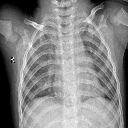

In [13]:
# Preview an image
array_to_img(train_images[5])

## Checking the Shape of Image and Label Arrays

In [14]:
print('Shape of Train Images: ', np.shape(train_images))
print('Shape of Train Labels: ', np.shape(train_labels))
print('Shape of Test Images: ', np.shape(test_images))
print('Shape of Test Labels: ', np.shape(test_labels))
print('Shape of Validation Images: ', np.shape(val_images))
print('Shape of Validation Labels: ', np.shape(val_labels))

Shape of Train Images:  (64, 128, 128, 3)
Shape of Train Labels:  (64, 2)
Shape of Test Images:  (64, 128, 128, 3)
Shape of Test Labels:  (64, 2)
Shape of Validation Images:  (16, 128, 128, 3)
Shape of Validation Labels:  (16, 2)


### Transform Label Matrices

In [15]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(64, 49152)
(64, 49152)
(16, 49152)


In [16]:
train_img[0]

array([0.09803922, 0.09803922, 0.09803922, ..., 0.00392157, 0.00392157,
       0.00392157], dtype=float32)

In [17]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(64, 2)
(64, 2)
(16, 2)


In [18]:
train_labels[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [19]:
# Verify the Class Labels
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
# Transform the labels
train_y = np.reshape(train_labels[:,0], (train_labels.shape[0],1))
test_y = np.reshape(test_labels[:,0], (test_labels.shape[0],1))
val_y = np.reshape(val_labels[:,0], (val_labels.shape[0],1))
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(64, 1)
(64, 1)
(16, 1)


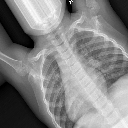

In [21]:
# Select a random image to verify
array_to_img(train_images[4])

In [22]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.42
Weight for class 1: 0.58


In [23]:
# Build a baseline fully connected model

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(49152,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                983060    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 983,253
Trainable params: 983,253
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
results = model.fit(train_img, train_y, 
    epochs=100,
    validation_data=(val_img, val_y),
    class_weight=class_weight)
    #steps_per_epoch=10,
    #validation_steps=25,)

Epoch 1/100
2/2 [==============================] - 2s 360ms/step - loss: 0.3442 - accuracy: 0.5104 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.3361 - accuracy: 0.5312 - val_loss: 0.7404 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3542 - accuracy: 0.4792 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3397 - accuracy: 0.5208 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.3384 - accuracy: 0.5208 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3399 - accuracy: 0.4896 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3354 - accuracy: 0.5521 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 8/100
2/2 [==

### Baseline Model Evaluation

In [27]:
evaluation_test = model.evaluate(test_img, test_y)
#print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")


2/2 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.6875


In [28]:
evaluation_train = model.evaluate(train_img, train_y) 
#print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2/2 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.8750


In [29]:
evaluation_train

[0.2906702160835266, 0.875]

In [30]:
evaluation_test

[0.7225325107574463, 0.6875]

In [31]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model (model,test_img,results,test_labels):
  test_labels= test_labels.argmax(axis=1)
  pred = model.predict(test_img).round()
  
  print(confusion_matrix(test_labels, pred ))
  print(classification_report(test_labels, pred, output_dict=False))
  visualize_training_results(results)


def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [33]:
def evaluate_cnn (model,test_generator,results):
  
  pred = model.predict(test_generator)
  
  print(confusion_matrix(test_generator.classes, pred > 0.5))
  print(classification_report(test_generator.classes, pred > 0.5, output_dict=False))
  visualize_training_results(results)

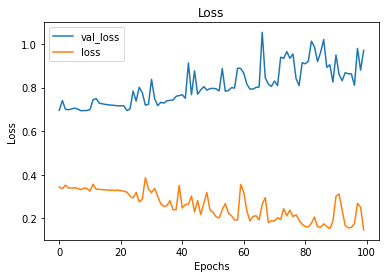

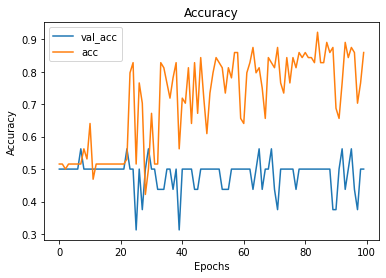

In [34]:
visualize_training_results (results)

In [35]:
 pred = model.predict(test_img)
 pred.round()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [36]:
test_labels.argmax(axis=1)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

[[19  1]
 [43  1]]
              precision    recall  f1-score   support

           0       0.31      0.95      0.46        20
           1       0.50      0.02      0.04        44

    accuracy                           0.31        64
   macro avg       0.40      0.49      0.25        64
weighted avg       0.44      0.31      0.17        64



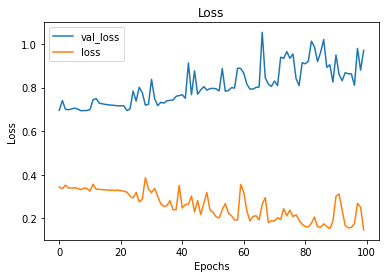

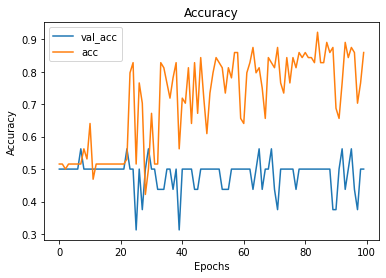

In [37]:
evaluate_model (model,test_img,results, test_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Accuracy Evolution')

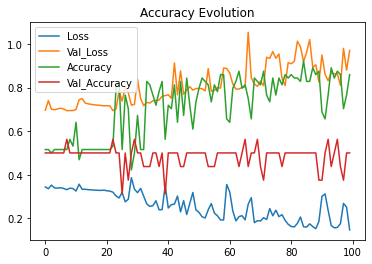

In [38]:
plt.subplot()
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot()
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [39]:
# from sklearn.metrics import confusion_matrix, classification_report

# pred = model.predict(test_img)
# # could round
# print(confusion_matrix(test_generator.classes, pred > 0.5))
# pd.DataFrame(classification_report(test_generator.classes, pred > 0.5, output_dict=True))


In [40]:
# print(confusion_matrix(test_generator.classes, pred > 0.7))
# pd.DataFrame(classification_report(test_generator.classes, pred > 0.7, output_dict=True))

In [41]:
# pred = pred.predict(val_images)

### Saving the Baseline Model

In [42]:
import time
import datetime
from datetime import date

model.save('baseline_chest_xray_ALL_data_'+str(date.today())+'.h5')

## CNN Modeling

In [43]:
# Optimizer
# Create a dictionary of optimizer, and assign different colors to the optimizers for plotting the model's loss
optimizers = {"RMSprop": {"optimizer": RMSprop(), "color":"blue"},
                  "adam_01": {"optimizer": Adam(lr=0.01), "color":"red"},
                  "sgd": {"optimizer": SGD(), "color":"purple"},
                  "adadelta": {"optimizer": Adadelta(), "color":"pink"},
                  "adagrad": {"optimizer": Adagrad(), "color":"yellow"}}

In [44]:
for optimizer, d in optimizers.items():
  print(f'Testing{optimizer}')

TestingRMSprop
Testingadam_01
Testingsgd
Testingadadelta
Testingadagrad


In [45]:
# Your code here; design and compile the model
model2 = Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

# Flattening- Convert 2D matrix to a 1D vector
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [46]:

results2=model2.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='baseline_chest_xray_ALL_data_'+str(date.today())+'.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
results2 = model2.fit(train_generator, 
                      epochs=10, 
                      callbacks=early_stopping, 
                      batch_size=64, 
                      validation_data=(val_generator))


Epoch 1/10
146/146 [==============================] - 2406s 16s/step - loss: 0.7057 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
146/146 [==============================] - 226s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
146/146 [==============================] - 225s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
146/146 [==============================] - 227s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
146/146 [==============================] - 228s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
146/146 [==============================] - 227s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
146/146 [==============================] - 228s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.50

## Model Evaluation

In [ ]:
evaluation_test2 = model.evaluate(test_generator)

In [ ]:
evaluation_train2 = model.evaluate(train_generator)

In [ ]:
visualize_training_results (results2)

In [ ]:
evaluate_model (model2,test_img,results2, test_labels)

In [ ]:
plt.subplot()
plt.plot(results2.history['loss'], label='Loss')
plt.plot(results2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot()
plt.plot(results2.history['accuracy'], label='Accuracy')
plt.plot(results2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
train_imgs, train_lbls = next(train_gen)


In [ ]:
val_imgs, val_lbls = next(val_gen)

In [ ]:
test_imgs, test_lbls = next(test_gen)

In [ ]:
print('Shape of Train Images: ', np.shape(train_imgs))
print('Shape of Train Labels: ', np.shape(train_lbls))
print('Shape of Validation Images: ', np.shape(val_imgs))
print('Shape of Validation Labels: ', np.shape(val_lbls))
print('Shape of Test Images: ', np.shape(test_imgs))
print('Shape of Test Labels: ', np.shape(test_lbls))

In [ ]:
train_lbls_final = np.reshape(train_lbls[:,0], (3883,1))
np.shape(train_lbls_final)

In [ ]:
val_lbls_final = np.reshape(val_lbls[:,0], (8,1))
np.shape(val_lbls_final)

In [ ]:
test_lbls_final = np.reshape(test_lbls[:,0], (390,1))
np.shape(test_lbls_final)

In [ ]:
plt.subplot()
plt.plot(results2.history['loss'], label='Loss')
plt.plot(results2.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot()
plt.plot(results2.history['accuracy'], label='Accuracy')
plt.plot(results2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluate_cnn(model2,test_gen,results2)

In [ ]:
visualize_training_results(results2)

In [ ]:
model2.save('CNN_chest_xray_ALL_data_'+str(date.today())+'.h5')